# Exploratory Data Analysis

In [253]:
import pandas as pd

## Datetime Data Type

### Apakah perbedaan antara `pd.to_datetime()` dengan `astype('datetime64')`?

Method `pd.to_datetime()` lebih fleksibel jika dibandingkan dengan `astype('datetime64')`.
Hal ini dikarenakan penggunaan method `pd.to_datetime()` memungkinkan kita untuk melakukan transformasi bentuk datetime dengan menambahkan parameter-parameter. Contohnya terdapat parameter `format` untuk melakukan formatting urutan tanggal.

In [254]:
pd.to_datetime('30-11-2020', format='%d-%m-%Y') # tanggal, bulan, tahun

Timestamp('2020-11-30 00:00:00')

### Bagaimana cara menghitung selisih atau jeda tanggal?

Selisih tanggal dapat dihitung menggunakan *method* `timedelta()` pada *library* `datetime`.
Berikut dibawah ini adalah ilustrasi penggunaannya:

In [255]:
household = pd.read_csv('data_input/household.csv')
household['purchase_time'] = pd.to_datetime(household['purchase_time'])
household['weekday'] = household['purchase_time'].dt.day_name()
household.head(2)

,receipt_id,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity,yearmonth,weekday
0,9622257,32369294,2018-07-22 21:19:00,Rice,Rice,supermarket,128000.0,0,1,2018-07,Sunday
1,9446359,31885876,2018-07-15 16:17:00,Rice,Rice,minimarket,102750.0,0,1,2018-07,Sunday


Tabel di atas adalah sebuah DataFrame `household` yang memuat informasi transaksi kebutuhan rumah tangga. Kolom `purchase_time` berisi informasi tanggal pembelian barang. Jika diketahui durasi pengiriman sebuah barang adalah 2 hari setelah barang dibeli, maka kita dapat menghitung estimasi barang sampai ke tangan pembeli dengan menggunakan *code* berikut:

In [256]:
from datetime import timedelta
household['shipdate_est'] = household['purchase_time'] + timedelta(days=2)
household.head(2)

,receipt_id,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity,yearmonth,weekday,shipdate_est
0,9622257,32369294,2018-07-22 21:19:00,Rice,Rice,supermarket,128000.0,0,1,2018-07,Sunday,2018-07-24 21:19:00
1,9446359,31885876,2018-07-15 16:17:00,Rice,Rice,minimarket,102750.0,0,1,2018-07,Sunday,2018-07-17 16:17:00


Apabila ingin lebih spesifik, kita dapat menambahkan parameter waktu lain pada `timedelta()`, mulai dari `weeks` hingga `microseconds` dengan contoh sebagai berikut:

In [257]:
household['shipdate_est_new'] = household['purchase_time'] + timedelta(weeks=0,
                                                                       days=1,
                                                                       hours=2,
                                                                       minutes=3,
                                                                       seconds=4,
                                                                       milliseconds=5,
                                                                       microseconds=6)
household.head(2)

,receipt_id,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity,yearmonth,weekday,shipdate_est,shipdate_est_new
0,9622257,32369294,2018-07-22 21:19:00,Rice,Rice,supermarket,128000.0,0,1,2018-07,Sunday,2018-07-24 21:19:00,2018-07-23 23:22:04.005006
1,9446359,31885876,2018-07-15 16:17:00,Rice,Rice,minimarket,102750.0,0,1,2018-07,Sunday,2018-07-17 16:17:00,2018-07-16 18:20:04.005006


### Ketika menggunakan perintah `dt.to_period('W')`, maka secara otomatis rentang *week* yang ditampilkan selalu dimulai dari hari Senin. Apakah ada cara untuk menampilkan rentang *week* yang dimulai dari hari Minggu

Apabila ingin menampilkan rentang *week* yang dimulai dari hari Minggu, maka dapat dituliskan syntax sebagai berikut :

In [258]:
household['purchase_time'].dt.to_period('W-SAT')

0        2018-07-22/2018-07-28
1        2018-07-15/2018-07-21
2        2018-07-15/2018-07-21
3        2018-07-22/2018-07-28
4        2018-07-22/2018-07-28
                 ...          
71995    2017-12-24/2017-12-30
71996    2017-12-10/2017-12-16
71997    2017-12-24/2017-12-30
71998    2017-12-03/2017-12-09
71999    2017-12-17/2017-12-23
Name: purchase_time, Length: 72000, dtype: period[W-SAT]

### Bagaimana cara mengubah nama hari atau bulan kedalam format Bahasa Indonesia?

Cara terbaik untuk mengubah nama hari/bulan ke dalam Bahasa Indonesia adalah dengan mengubah *locale time* terlebih dahulu, kemudian gunakan *method* `strftime()` untuk mengekstrak komponen dari datetimenya.

Berikut adalah [referensi Python strftime](https://strftime.org/) untuk format penulisan strftime.

In [259]:
import locale
locale.setlocale(locale.LC_TIME, "id")

household['purchase_time'].dt.strftime("%A")

0        Minggu
1        Minggu
2        Minggu
3        Selasa
4         Kamis
          ...  
71995      Rabu
71996      Rabu
71997      Rabu
71998     Kamis
71999    Selasa
Name: purchase_time, Length: 72000, dtype: object

## Categorical Data Type

### Bagaimana cara mengetahui level pada category?

Cara mengetahui level pada category dapat menggunakan attribut `cat.categories` atau dapat menggunakan *method* `unique()`.
Berikut adalah contoh implementasinya:

In [260]:
# mengubah tipe data menjadi category
household[['category','sub_category','format','yearmonth','weekday']] = \
household[['category','sub_category','format','yearmonth','weekday']].astype('category')

In [261]:
household['format'].cat.categories

Index(['hypermarket', 'minimarket', 'supermarket'], dtype='object')

In [262]:
household['format'].unique()

['supermarket', 'minimarket', 'hypermarket']
Categories (3, object): ['supermarket', 'minimarket', 'hypermarket']

**Apa yang membedakan `cat.categories` dengan `unique()`**
- `cat.categories` adalah atribut milik tipe data categorical, sehingga tidak dapat digunakan selain tipe data categorical. 
- `unique()` adalah *method* yang dimiliki oleh `pandas` sehingga dapat digunakan secara fleksible untuk tipe data lainnya.

## Contingency Table

### Apa kegunaan parameter `margins=True` pada method `pd.crosstab`?

Parameter `margins=True` pada crosstab digunakan untuk menjumlahkan hasil cross tabulasi, sehingga ada kolom tambahan dengan nama kolom `"All"` yang berisi total nilai.

In [263]:
household_crosstab = \
pd.crosstab(
    index=household['category'],
    columns=household['format'],
    values=household['unit_price'],
    aggfunc='mean',
    margins=True
)
household_crosstab

format,hypermarket,minimarket,supermarket,All
category,,,,
Fabric Care,19328.141915,17757.135774,17847.557137,17893.793214
Rice,71205.458458,67135.569554,74921.182150,70013.146313
Sugar/Flavored Syrup,13539.915728,12352.135470,13071.112361,12645.066024
All,27079.468095,23460.177971,27457.145330,24830.776334


### Apakah kita dapat melakukan `sort_values()` pada kolom `All` saat parameter `margins=True`?

Bisa, kita dapat melakukan pengurutan seperti biasa dengan menganggap kolom `All` seperti kolom lainnya. Berikut adalah contohnya, `axis=0` digunakan untuk memastikan bahwa **baris** diurutkan berdasarkan kolom `All`:

In [264]:
household_crosstab.sort_values(by='All', axis=0)

format,hypermarket,minimarket,supermarket,All
category,,,,
Sugar/Flavored Syrup,13539.915728,12352.135470,13071.112361,12645.066024
Fabric Care,19328.141915,17757.135774,17847.557137,17893.793214
All,27079.468095,23460.177971,27457.145330,24830.776334
Rice,71205.458458,67135.569554,74921.182150,70013.146313


Sedangkan apabila kita menggunakan `axis=1`, **kolom** akan diurutkan berdasarkan baris `All`:

In [265]:
household_crosstab.sort_values(by='All', axis=1)

format,minimarket,All,hypermarket,supermarket
category,,,,
Fabric Care,17757.135774,17893.793214,19328.141915,17847.557137
Rice,67135.569554,70013.146313,71205.458458,74921.182150
Sugar/Flavored Syrup,12352.135470,12645.066024,13539.915728,13071.112361
All,23460.177971,24830.776334,27079.468095,27457.145330


## Missing Values

### Bagaimana menampilkan data yang memiliki missing values saja?

Objek `household2` berikut adalah contoh DataFrame yang memiliki beberapa *missing values* didalamnya. 

In [266]:
household = pd.read_csv("data_input/household.csv", index_col=1, parse_dates=['purchase_time'])
household.drop(['receipt_id', 'yearmonth', 'sub_category'], axis=1, inplace=True)
household['weekday'] = household['purchase_time'].dt.day_name()
import math
x=[i for i in range(32000000, 32000005)]
x.insert(2,32030785)
household2 = household.head(6).copy()
household2 = household2.reindex(x)
household2 = pd.concat([household2, household.head(14)])
household2.loc[31885876, "weekday"] = math.nan

In [267]:
household2

,purchase_time,category,format,unit_price,discount,quantity,weekday
receipts_item_id,,,,,,,
32000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32000001,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32030785,2018-07-17 18:05:00,Rice,minimarket,63500.0,0.0,1.0,Tuesday
32000002,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32000003,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32000004,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32369294,2018-07-22 21:19:00,Rice,supermarket,128000.0,0.0,1.0,Sunday
31885876,2018-07-15 16:17:00,Rice,minimarket,102750.0,0.0,1.0,NaN
31930241,2018-07-15 12:12:00,Rice,supermarket,64000.0,0.0,3.0,Sunday


Berikut adalah kode yang dapat digunakan untuk menampilkan data yang memiliki *missing values* saja.
- Method `.isna()` digunakan untuk melakukan pengecekan *missing values*
- Method `.any(axis=1)` mengecek apakah terdapat *missing values* pada **kolom**.

In [268]:
household2[household2.isna().any(axis=1)]

,purchase_time,category,format,unit_price,discount,quantity,weekday
receipts_item_id,,,,,,,
32000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32000001,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32000002,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32000003,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32000004,NaT,NaN,NaN,NaN,NaN,NaN,NaN
31885876,2018-07-15 16:17:00,Rice,minimarket,102750.0,0.0,1.0,NaN


### Bagaimana cara menangani *missing values* pada data?

Terdapat berbagai cara menangani data yang mengandung *missing value*, yang paling umum adalah *deletion*, *full analysis*, dan *imputation*.

**a. Deletion** adalah **membuang variabel/kolom** pada data yang memiliki jumlah *missing value* (NA) melebihi 50% dari jumlah observasi. Hal ini menganggap bahwa variabel tersebut tidak banyak memberikan informasi pada data. Ketika membuang variabel perlu memperhatikan business case dari data tersebut, apakah variabel yang dibuang akan menghilangkan informasi yang cukup signifikan atau tidak? Apakah ketika variabel tersebut dibuang ada informasi yang berkurang dari data tersebut atau tidak?

Di bawah ini adalah dataframe `household3` yang memiliki lebih dari 50% *missing values* pada variable `weekday` 

In [269]:
household3 = household.head(6).copy()
household3 = household3.reindex(x)
household3 = pd.concat([household3, household.head(9)])
household3.loc[31885876:32935097, "weekday"] = math.nan

In [270]:
household3

,purchase_time,category,format,unit_price,discount,quantity,weekday
receipts_item_id,,,,,,,
32000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32000001,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32030785,2018-07-17 18:05:00,Rice,minimarket,63500.0,0.0,1.0,Tuesday
32000002,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32000003,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32000004,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32369294,2018-07-22 21:19:00,Rice,supermarket,128000.0,0.0,1.0,Sunday
31885876,2018-07-15 16:17:00,Rice,minimarket,102750.0,0.0,1.0,NaN
31930241,2018-07-15 12:12:00,Rice,supermarket,64000.0,0.0,3.0,NaN


Sebelum melakukan proses **deletion** mari cek terlebih dahulu jumlah proporsi *missing values* pada observasi.

In [271]:
household3.isna().sum()/len(household3)*100

purchase_time    33.333333
category         33.333333
format           33.333333
unit_price       33.333333
discount         33.333333
quantity         33.333333
weekday          73.333333
dtype: float64

Hasil pengecekan di atas, menunjukkan bahwa variable `weekday` memiliki 73% *missing values*. Dikarenakan jumlah *missing values* lebih dari 50% dari jumlah observasi pada data, maka variable `weekday` dapat dihapus.

In [272]:
household3.drop(columns='weekday',inplace=True)

In [273]:
household3

,purchase_time,category,format,unit_price,discount,quantity
receipts_item_id,,,,,,
32000000,NaT,NaN,NaN,NaN,NaN,NaN
32000001,NaT,NaN,NaN,NaN,NaN,NaN
32030785,2018-07-17 18:05:00,Rice,minimarket,63500.0,0.0,1.0
32000002,NaT,NaN,NaN,NaN,NaN,NaN
32000003,NaT,NaN,NaN,NaN,NaN,NaN
32000004,NaT,NaN,NaN,NaN,NaN,NaN
32369294,2018-07-22 21:19:00,Rice,supermarket,128000.0,0.0,1.0
31885876,2018-07-15 16:17:00,Rice,minimarket,102750.0,0.0,1.0
31930241,2018-07-15 12:12:00,Rice,supermarket,64000.0,0.0,3.0


**b. Full analysis** adalah **membuang observasi/baris** yang mengandung *missing value*. Cara ini dilakukan jika jumlah observasi yang mengandung *missing value* tidak melebihi 5% dari total observasi data.

In [274]:
household = pd.read_csv("data_input/household.csv", index_col=1, parse_dates=['purchase_time'])
household.drop(['receipt_id', 'yearmonth', 'sub_category'], axis=1, inplace=True)
household['weekday'] = household['purchase_time'].dt.day_name()
import math
x=[i for i in range(32000000, 32000002)]
x.insert(2,32030785)
household4 = household.head(6).copy()
household4 = household4.reindex(x)
household4 = pd.concat([household4, household.head(40)])

Di bawah ini adalah dataframe `household4` yang memiliki kurang dari 5% *missing values* pada observasi.

In [275]:
household4

,purchase_time,category,format,unit_price,discount,quantity,weekday
receipts_item_id,,,,,,,
32000000,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32000001,NaT,NaN,NaN,NaN,NaN,NaN,NaN
32030785,2018-07-17 18:05:00,Rice,minimarket,63500.0,0.0,1.0,Tuesday
32369294,2018-07-22 21:19:00,Rice,supermarket,128000.0,0.0,1.0,Sunday
31885876,2018-07-15 16:17:00,Rice,minimarket,102750.0,0.0,1.0,Sunday
31930241,2018-07-15 12:12:00,Rice,supermarket,64000.0,0.0,3.0,Sunday
32418582,2018-07-24 08:27:00,Rice,minimarket,65000.0,0.0,1.0,Tuesday
32561236,2018-07-26 11:28:00,Rice,supermarket,124500.0,0.0,1.0,Thursday
32030785,2018-07-17 18:05:00,Rice,minimarket,63500.0,0.0,1.0,Tuesday


Sebelum melakukan proses **pembuangan baris** mari cek terlebih dahulu jumlah proporsi *missing values* pada observasi.

In [276]:
((household4.isna().sum().sum()/household4.size)*100).round(2)

4.65

Hasil pengecekan di atas menunjukkan bahwa jumlah *missing values* tidak lebih dari 5% dari keseluruhan total observasi. Maka dapat dilakukan pembuangan baris pada nilai *missing*

In [277]:
household4.dropna(inplace=True)

In [278]:
household4.isna().sum()

purchase_time    0
category         0
format           0
unit_price       0
discount         0
quantity         0
weekday          0
dtype: int64

**c. Imputation** adalah **mengisi *missing value*** dengan suatu nilai tertentu. Cara ini dilakukan apabila jumlah missing value pada data cukup banyak (melebihi 5% jumlah observasi). Imputation umum dilakukan berdasarkan business knowledge dari variabel tersebut. Misalkan variabel jumlah pengunjung per jam pada sebuah restoran, seharusnya terdapat jumlah visitor yang bernilai 0 pada jam-jam tertentu karena pasti terdapat kemungkinan pada jam-jam tertentu tidak terdapat pengunjung. Apabila secara business knowledge seharusnya observasi tersebut memiliki suatu nilai, kita bisa melakukan imputation dengan menggunakan pusat datanya seperti mean/median untuk variabel numerik dan modus untuk variabel kategorik.

In [279]:
household = pd.read_csv("data_input/household.csv", index_col=1)
household.drop(['receipt_id','purchase_time','yearmonth', 'sub_category'], axis=1, inplace=True)
import math
x=[i for i in range(32000000, 32000005)]
x.insert(2,32030785)
household5 = household.head(6).copy()
household5 = household5.reindex(x)
household5 = pd.concat([household5, household.head(14)])
household5['format'] = household5['format'].astype('category')

Di bawah ini adalah dataframe household5 yang memiliki lebih dari 5% *missing values* pada observasi.

In [280]:
household5

,category,format,unit_price,discount,quantity
receipts_item_id,,,,,
32000000,NaN,NaN,NaN,NaN,NaN
32000001,NaN,NaN,NaN,NaN,NaN
32030785,Rice,minimarket,63500.0,0.0,1.0
32000002,NaN,NaN,NaN,NaN,NaN
32000003,NaN,NaN,NaN,NaN,NaN
32000004,NaN,NaN,NaN,NaN,NaN
32369294,Rice,supermarket,128000.0,0.0,1.0
31885876,Rice,minimarket,102750.0,0.0,1.0
31930241,Rice,supermarket,64000.0,0.0,3.0


Pada dataframe tersebut di atas, terdapat missing values pada masing-masing kolomnya. 
Mari **asumsikan** berdasarkan *business knowledge* proses imputasi akan dilakukan berdasarkan ketentuan berikut:
1. variable `discount` dan `quantity` diisi dengan nilai 0
2. variable `category` diisi dengan wording "unknown"
3. variable `format` diisi dengan nilai pusat data (modus)
4. variable `unit_price` diisi dengan nilai pusat datanya

In [281]:
#1. Mengisi variable discount dan quantity dengan nilai 0
household5[['discount','quantity']] = household5[['discount','quantity']].fillna(0)

In [283]:
#2. Mengisi variable category dengan wording unknown
household5['category'] = household5['category'].fillna('unknown')

In [282]:
#3. Mengisi variable format dengan pusat data (modus)
household5['format'] = household5['format'].fillna(household5['format'].mode()[0])

Sebelum melakukan imputasi pada variable `unit_price` sebaiknya lakukan pengecekan terhadap distribusi nilai pada `unit_price` terlebih dahulu. Hal ini untuk memastikan pusat data apa yang tepat untuk mengisi *missing values* pada data tersebut.
Pengisian *missing values* menggunakan `mean` dapat dilakukan apabila tidak terdapat outlier yang significant dan distribusi histogram tidak *skewed* (terdistribusi normal).
Sedangkan pengisian *missing values* menggunakan `median` sebaiknya dilakukan ketika terdapat outlier atau distribusi datanya tidak normal.

<AxesSubplot:>

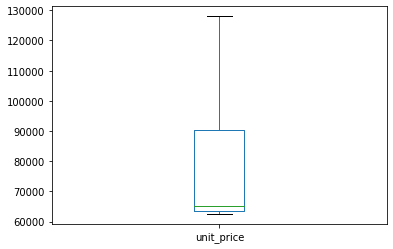

In [284]:
household5['unit_price'].plot(kind='box')

Histogram di atas menunjukkan bahwa data tidak memiliki outlier/anomali, namun untuk distribusinya nilainya didominasi dengan rentang nilai di bawah 70000. Hal ini menyebabkan distribusi data menjadi tidak normal atau *skewed*.
Maka, dari visualisasi di atas cara terbaik untuk melakukan imputasi *missing values* pada *variable* `unit_price` adalah dengan menggunakan `median`.

In [285]:
household5['unit_price'] = household5['unit_price'].fillna(household5['unit_price'].median())

In [286]:
household5

,category,format,unit_price,discount,quantity
receipts_item_id,,,,,
32000000,unknown,minimarket,65000.0,0.0,0.0
32000001,unknown,minimarket,65000.0,0.0,0.0
32030785,Rice,minimarket,63500.0,0.0,1.0
32000002,unknown,minimarket,65000.0,0.0,0.0
32000003,unknown,minimarket,65000.0,0.0,0.0
32000004,unknown,minimarket,65000.0,0.0,0.0
32369294,Rice,supermarket,128000.0,0.0,1.0
31885876,Rice,minimarket,102750.0,0.0,1.0
31930241,Rice,supermarket,64000.0,0.0,3.0
